## Plotting script for Gas Dynamics numerical project

In [2]:
indir = '/Users/yaolun/Copy/UT-Austin/Courses/AST382C_Gas_Dynamics/np_code/'
plotdir = '/Users/yaolun/Copy/UT-Austin/Courses/AST382C_Gas_Dynamics/np_code/'
%matplotlib inline

### default setting

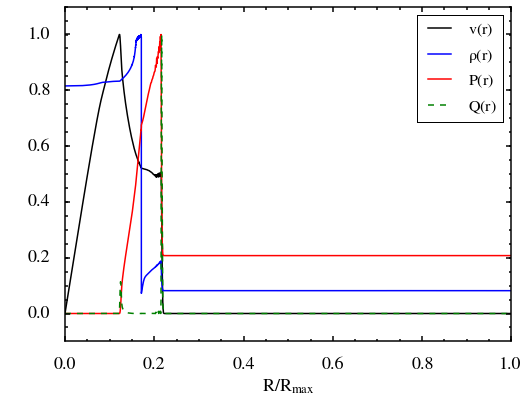

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

# file format:
# grid#, m, r, u(velocity), rho, p, epsilon, w(artificial viscousity)
out = ascii.read(indir+'wind/lh1.out',format='no_header')

# problem 1
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

v, = ax.plot(out['col3'], out['col4'], linewidth=1.5, color='k')
rho, = ax.plot(out['col3'], out['col5'], '-', linewidth=1.5, color='b')
P, = ax.plot(out['col3'], out['col6'], linewidth=1.5, color='r')
Q, = ax.plot(out['col3'], out['col8'], '--',linewidth=1.5, color='g')
ax.legend([v, rho, P, Q], [r'$\rm{v(r)}$', r'$\rm{\rho(r)}$', r'$\rm{P(r)}$', r'$\rm{Q(r)}$'],\
          loc='upper right', fontsize=16)
ax.set_ylim([-0.1,1.1])
ax.set_xlabel(r'$\rm{R/R_{max}}$', fontsize=18)
ax.set_ylabel(r'$\rm{normalized~quantities}$', fontsize=18)
# ax.set_xlim([0,0.1])

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig(plotdir+'p1.pdf', format='pdf', dpi=300, bbox_inches='tight')


### various q values

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import ascii
from mpl_toolkits.axes_grid1 import AxesGrid
file_array = [indir+'run1/', indir+'q1/', indir+'q05/', indir+'q025/', indir+'q01/', indir+'q0/']
label_grid = [r'$mathrm{q=2.0}$', r'$\mathrm{q=1.0}$', r'$\mathrm{q=0.5}$', \
              r'$\mathrm{q=0.25}$', r'$\mathrm{q=0.1}$', r'$\mathrm{q=0}$']
color_list = ['#7a0177','#c51b8a','#f768a1','#fa9fb5','#fcc5c0','#feebe2']
col = ['col4','col5','col6','col8']
col_label = [r'$\mathrm{v(r)}$',r'$\mathrm{\rho(r)}$',r'$\mathrm{P(r)}$',r'$\mathrm{Q(r)}$']

fig = plt.figure(figsize=(30,30))
grid = AxesGrid(fig, 142, # similar to subplot(142)
                    nrows_ncols = (2, 2),
                    axes_pad = 0,
                    share_all=True,
                    label_mode = "L",
                    )
for i in range(4):
    for j in range(0, len(file_array)):
        out = ascii.read(file_array[j]+'lh1.out')
        grid[i].plot(out['col3'], out[col[i]], linewidth=1.5, color=color_list[j], label=label_grid[j])
    grid[i].legend(loc='upper right', fontsize=14)
    grid[i].set_xlabel(r'$\mathrm{r/r_{max}}$', fontsize=14)
    grid[i].set_ylabel(col_label[i], fontsize=14)
    [grid[i].spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
    grid[i].tick_params('both',labelsize=12,width=1.2,which='major',pad=10,color='white',length=5)
    grid[i].tick_params('both',labelsize=12,width=1.2,which='minor',pad=10,color='white',length=2.5)

fig.savefig(plotdir+'q_value.pdf',format='pdf',dpi=300,bbox_inches='tight')